# LENS Multi Simulation Mean Plots

In [323]:
import numpy as np
import scipy.stats as sp 
import scipy.stats as stats
import matplotlib.pyplot as mp
from matplotlib.ticker import PercentFormatter
import shapely.geometry as sgeom


import xarray as xr
import datetime as dt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

from pprint import pprint

<hr>
Set up datasets
<hr>

In [335]:
run_info =  {}


################
#### LENS 1 ####
################


#run_info['run_set'] = 'lens1'

# Dir if on CGD/thorodin
#run_info['run_root'] = '/project/mojave/cesm1/LENS/atm/' # LENS root directory
#run_info['run_freq'] = 'month_1' #Frequency to analyze


# Dir if on casper/cheyenne
#run_info['run_root'] = '/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/atm/proc/tseries/' # LENS root directory
#run_info['run_freq'] = 'monthly' #Frequency to analyze



## PD ##
#run_info['run_pref'] = 'b.e11.B20TRC5CNBDRD.f09_g16' ; rtype='historical'
#run_info['run_suff'] = '192001-200512' # File suffix
#run_info['run_yrs'] =  (1979,2005) #First/last years to grab



## RCP85 ##
#run_info['run_pref'] = 'b.e11.BRCP85C5CNBDRD.f09_g16' ; rtype = 'rcp85'
#run_info['run_suff'] = '208101-210012' # File suffix
#run_info['run_yrs'] =  (2081,2100) # First/last years to grab


################
#### LENS 2 ####
################


run_info['run_set'] = 'lens2'


# Dir if on casper/cheyenne
run_info['run_root'] = '/glade/campaign/cgd/cesm/CESM2-LE/atm/proc/tseries/' # LENS root directory
run_info['run_freq'] = 'month_1' #Frequency to analyze


## PD ##
run_info['run_pref'] = 'b.e21.BHISTcmip6.f09_g17.LE2' ; rtype='historical'
run_info['run_suff'] = '192001-200512' # File suffix
run_info['run_yrs'] =  (1979,2005) #First/last years to grab



## RCP85 ##
#run_info['run_pref'] = 'b.e11.BRCP85C5CNBDRD.f09_g16' ; rtype = 'rcp85'
#run_info['run_suff'] = '208101-210012' # File suffix
#run_info['run_yrs'] =  (2081,2100) # First/last years to grab





################
#### CMIP6  ####
################

#run_info['run_set'] = 'cmip6'
#run_info['run_freq'] = 'monthly' 


## PD ##
#lens_range = False
#run_info['run_pref'] = '' ; rtype='historical'
#run_info['run_yrs'] =  (1948,2005) # First/last years to grab
#run_info['run_suff'] = '185001-201412'
#run_info['run_ens'] = (1,2,3,4,5,6,7,8,10,11) # First and last ensemble member


## RCP85/SSP85 ##
lens_range = True
#run_info['run_pref'] = '' ; rtype='ssp585'
#run_info['run_yrs'] =  (2081,2100) # First/last years to grab
#run_info['run_suff'] = '185001-201412'
run_info['run_ens'] = (2,40) # Only subset availabele for some reason.



run_info['plot_obs'] = True # Obs if future mostly.
run_info['obs_yrs'] = (1948,2005)
run_info['run_var'] = 'TS' ; vscale = 1.


run_info['run_period'] =  ('Dec','Jan','Feb') # Monthly to consider


# Regions (lats/latn/lonw/lone)
#run_info['run_reg'] = np.array([-12.5,5.,50,100]) ; ave_dim= 'lon'; pname = 'Ind' # Lat/on  ranges for AZ+NM
run_info['run_reg'] = np.array([-5.,5.,160,190]) ; ave_dim = 'lat'; pname = 'Pac' # Lat/on  ranges for AZ+NM



** ens num,name =  0 2 1231.001
--/glade/campaign/cgd/cesm/CESM2-LE/atm/proc/tseries/month_1/TS/b.e21.BHISTcmip6.f09_g17.LE2-1231.001.cam.h0.TS*.nc
[  0   1  11  12  13  23  24  25  35  36  37  47  48  49  59  60  61  71
  72  73  83  84  85  95  96  97 107 108 109 119 120 121 131 132 133 143
 144 145 155 156 157 167 168 169 179 180 181 191 192 193 203 204 205 215
 216 217 227 228 229 239 240 241 251 252 253 263 264 265 275 276 277 287
 288 289 299 300 301 311 312 313 323]

** ens num,name =  1 3 1231.002
--/glade/campaign/cgd/cesm/CESM2-LE/atm/proc/tseries/month_1/TS/b.e21.BHISTcmip6.f09_g17.LE2-1231.002.cam.h0.TS*.nc
[  0   1  11  12  13  23  24  25  35  36  37  47  48  49  59  60  61  71
  72  73  83  84  85  95  96  97 107 108 109 119 120 121 131 132 133 143
 144 145 155 156 157 167 168 169 179 180 181 191 192 193 203 204 205 215
 216 217 227 228 229 239 240 241 251 252 253 263 264 265 275 276 277 287
 288 289 299 300 301 311 312 313 323]

** ens num,name =  2 4 1231.003
--/glade/

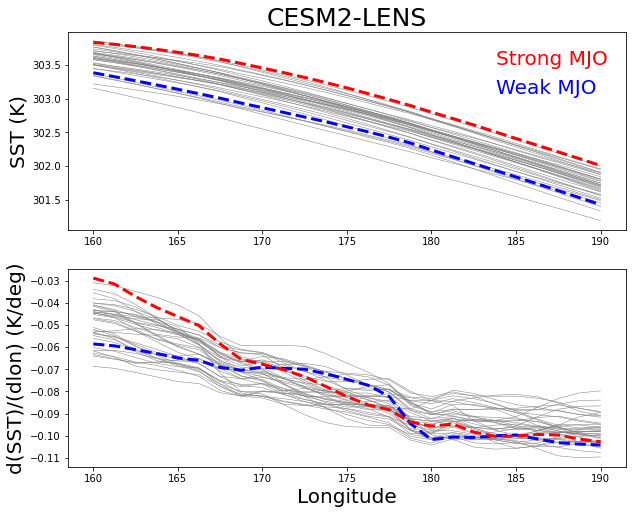

In [337]:
##################################

run_root   = run_info['run_root']
run_set    = run_info['run_set'] 
run_freq   = run_info['run_freq']
run_obs    = run_info['plot_obs']
obs_yrs    = run_info['obs_yrs']
run_pref   = run_info['run_pref']
run_var    = run_info['run_var']
run_ens    = run_info['run_ens']
run_suff   = run_info['run_suff']
run_yrs    = run_info['run_yrs']
run_period = run_info['run_period']
run_reg    = run_info['run_reg']

# OBS #
obs_root = '/glade/work/rneale/data/NOAA_CPC_USA/'

#nens = run_ens[1]-run_ens[0]+1
nmonths = len(run_period)


# Regions in string
reg_a_out = '%d-%dW_%.1f-%dN' % (360-run_reg[2],360-run_reg[3],run_reg[0],run_reg[1])
#str(run_yrs[0]):str(run_yrs[1]),run_reg[0]:run_reg[1],run_reg[2]:run_reg[3]] 
lat_reg =  []
lon_reg =  []
time_reg = [str]


# Ensemble number/name array #
if lens_range: 
    run_nums = np.arange(run_ens[0],run_ens[1]+1,1) # Wierdly needs run_ens+1
else:
    run_nums = np.array(run_ens)

nens = len(run_nums)

var_tav_ens = False
nyrs = run_yrs[1]-run_yrs[0]+1 # Number of years


var_tav_ts = np.zeros((nmonths,len(run_nums),nyrs))

#if run_set=='lens1'

nens_lens2 = 10
yr0_lens2 = np.array(['1231','1251','1281','1301'])

nyr0_lens2 = yr0_lens2.size
yr0_lens2_arr = np.sort(np.tile(yr0_lens2,nens_lens2)) #Make copies of yr0 for each ensemble member
ens_lens2_arr = np.tile(np.arange(1,nens_lens2+1),nyr0_lens2) # Reverse for each year
#yr0_lens2_arr = np.array([item + '-' for item in yr0_lens2_arr]).astype(str) #Add a '-'
#print(yr0_lens2_arr.dtype)

#print(yr0_lens2_arr)
#print(ens_lens2_arr.dtype)

## Cannot figure out why they ar enow different data types
#lens2_yr_ens = np.add(yr0_lens2_arr.astype(str),ens_lens2_arr.astype(str))


#var_tav_ens = None
fig, ax = mp.subplots(2,1,figsize=(10, 8))



### ### ### ### ### 
###  Loop Cases ###
### ### ### ### ### 

for ir,rname in enumerate(run_nums):
   
    if run_set=='lens1':
        rnamef = '{:03}'.format(rname) # Format for ens# in LENS
        run_file = run_root+run_freq+'/'+run_var+'/'+run_pref+'.'+str(rnamef)+'.cam.h0.'+run_var+'.'+run_suff+'.nc'
        
    if run_set=='lens2':
       
        rnamef = yr0_lens2_arr[ir]+'.'+'{:03}'.format(ens_lens2_arr[ir]) # Format for ens# in LENS
        run_file = run_root+run_freq+'/'+run_var+'/'+run_pref+'-'+str(rnamef)+'.cam.h0.'+run_var+'*.nc'

    if run_set=='cmip6':
        rname = '{:01}'.format(rnamef) # Format for ens# in LENS
        if rtype=='historical':
            run_file0 = run_root+'CMIP/NCAR/CESM2/historical/'
#  run_file = run_file0+'r'+rname+'i1p1f1/Amon/'+run_var+'/gn/latest/'+run_var+'_Amon_CESM2_historical_r'+rname+'i1p1f1_gn_'+run_suff+'.nc'
            run_file = run_file0+'r'+rnamef+'i1p1f1/Amon/'+run_var+'/gn/latest/'+run_var+'_Amon_CESM2_historical_r'+rnamef+'i1p1f1_gn_*.nc'
        if rtype=='ssp585':
            print('hi')
            run_file0 = run_root+'ScenarioMIP/NCAR/CESM2/ssp585/'
            run_file = run_file0+'r'+rnamef+'i1p1f1/Amon/'+run_var+'/gn/latest/'+run_var+'_Amon_CESM2_ssp585_r'+rnamef+'i1p1f1_gn_*.nc'
        
        
    print('')
    print('** ens num,name = ', ir,rname,rnamef)
    print('--'+run_file)
    
# Regional/temporal data selection

    if run_var=='PRECT':
        run_file_c = run_root+run_freq+'/PRECC/'+run_pref+'.'+str(rnamef)+'.cam.h0.PRECC.'+run_suff+'.nc'
        run_obj_c = xr.open_dataset(run_file_c,engine='netcdf4')
    
        run_file_l = run_root+run_freq+'/PRECL/'+run_pref+'.'+str(rnamef)+'.cam.h0.PRECL.'+run_suff+'.nc'
        run_obj_l = xr.open_dataset(run_file_l,engine='netcdf4')
        
        var_c = run_obj_c['PRECC'].loc[str(run_yrs[0]):str(run_yrs[1]),run_reg[0]:run_reg[1],run_reg[2]:run_reg[3]] 
        var_l = run_obj_l['PRECL'].loc[str(run_yrs[0]):str(run_yrs[1]),run_reg[0]:run_reg[1],run_reg[2]:run_reg[3]] 
        var   = var_c+var_l
        
    else :
#        run_obj = xr.open_dataset(run_file,engine='netcdf4')
        run_obj = xr.open_mfdataset(run_file,engine='netcdf4')
        var = run_obj[run_var].loc[str(run_yrs[0]):str(run_yrs[1]),run_reg[0]:run_reg[1],run_reg[2]:run_reg[3]] 
        
    var = var*vscale
    
# Latitude (weighted) and longitude averaging
    gw_lat = np.cos(np.deg2rad(var.lat.values))  # Latitude weights

#    var_av = (var * gw_lat[None, :, None]).sum(dim='lat') / np.sum(gw_lat)

    var_av = var.mean(ave_dim)
    if ave_dim=='lat' :
        var_av_dim = var_av.lon ; xalabel = "Longitude"
        yalabel = 'd(SST)/(dlon) (K/deg)'
    else :
        yalabel = var_av.lat ; xalabel = "Latitude"
        yalabel = 'd(SST)/(dlat) (K/deg)'
        
    
# Time average (month or season)
    if ir==0:
        time = var.time # Read time
        months = time.dt.month # Array of months number
        mon_name = time.dt.strftime('%b') # Array of month names
        ptime = time.dt.year+(time.time.dt.month-1)/12 # Fraction of year (jan=0). x-axis on tseries plots\    
        pyear = time.dt.year # Just grab year array for tseries plots
  
# Pick out averaging months 

    ind_mons = np.where(np.in1d(mon_name, run_period))[0] #Picks out reqwested months available in full data.
    var_av = var_av[ind_mons,:].mean('time')
    print(ind_mons)


###########################
## Lon or Lat Plot Averages
###########################

    line_col,lw,lstyle,zord = ('gray',0.5,'-',0)
    if run_set=='lens1':
        model_name = 'CESM1-LENS'
        if rname == 4:line_col,lw,lstyle,zord = ('blue',3,'--',10) ; print("   ---- Weakest MJO ----")         
        if rname == 24:line_col,lw,lstyle,zord = ('red',3,'--',10) ; print("   ---- Strongest MJO ----")         
        
    if run_set=='lens2':
        model_name = 'CESM2-LENS'
        if rname == 31:line_col,lw,lstyle,zord = ('blue',3,'--',10) ; print("   ---- Weakest MJO ----")         
        if rname == 39:line_col,lw,lstyle,zord = ('red',3,'--',10)  ; print("   ---- Strongest MJO ----")            
            
# Strong 1251-01 rname=12
# Strong 1301-08 rname=39

# Weak   1281-10 rname=31
#1301-08  
#1281-04

    var_av_grad = np.gradient(var_av) 
    ax[0].plot(var_av_dim,var_av,color=line_col,lw=lw,linestyle=lstyle,zorder=zord)
    ax[1].plot(var_av_dim,var_av_grad,color=line_col,lw=lw,linestyle=lstyle,zorder=zord)
    
    ax[0].set_title(model_name,fontsize = 25)
    ax[0].set_ylabel('SST (K)',fontsize=20) 
    ax[0].legend(labels=['Strong MJO','Weak MJO'],labelcolor =['red','blue'],handlelength=0., frameon=False,fontsize='20')
#    ax[0].set_xlabel(xalabel)
#    ax[0].vlines(0., min(var_av),max(var_av), linestyle="dotted",lw=1)
    
#    ax[1].set_title(model_name)
    ax[1].set_ylabel(yalabel,fontsize=20) 
    ax[1].set_xlabel(xalabel,fontsize=20) 
#    ax[1].vlines(0., min(var_av_grad),max(var_av_grad), linestyle="dotted",lw=1)
    
    mp.savefig('../../python-figs//variability/SST_MJO_strong-week_'+model_name+'_'+reg_a_out+'.png', dpi=300)    
   

-- Region ->  -200.0 -5.0 -170.0 5.0



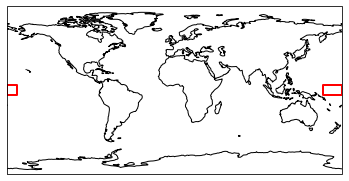

In [326]:
 

#############################
###### Observations #########
#############################

#if run_obs :

#    obs_file = obs_root+'precip.V1.0.mon.mean.nc'
#    obs_obj = xr.open_dataset(obs_file,engine='netcdf4')
#    ovar = obs_obj['precip'].loc[str(obs_yrs[0]):str(obs_yrs[1]),run_reg[0]:run_reg[1],run_reg[2]:run_reg[3]] 

    
    
# Latitude (weighted) and longitude averaging
#    ogw_lat = np.cos(np.deg2rad(ovar.lat.values))  # Latitude weights
#    ovar_av = (ovar * ogw_lat[None, :, None]).sum(dim='lat') / np.sum(ogw_lat)
#    ovar_av = ovar_av.mean('lon')
    
    
# Obs. time
#    time = ovar.time # Read time
#    months = time.dt.month # Array of months number

#    mon_name = time.dt.strftime('%B') # Array of month names
#    ptime = time.dt.year+(time.time.dt.month-1)/12 # Fraction of year (jan=0). x-axis on tseries plots
#    pyear0 = time.dt.year # Just brab year array for tseries plots

#    obs_tav_tup = () # Reset for this run
    
    
# Accumulate #
#    for im in range(len(run_period)):
#        im4ave = np.where(mon_name==run_period[im]) # Indices for this month

#        obs_tav = ovar_av[im4ave] # Values each year for this month.
#        obs_tav_now = obs_tav                    
#        obs_tav_tup = obs_tav_tup+(obs_tav_now,) # Add to tuple for plotting






########################################       
## Plot map with averaging location   ##
########################################       

figm = mp.figure()

axm = figm.add_subplot(projection=ccrs.PlateCarree())

r1 = run_reg[2] if run_reg[3] <=180. else run_reg[2]-360.
r2 = run_reg[0] 
r3 = run_reg[3] if run_reg[3] <=180. else run_reg[3]-360.
r4 = run_reg[1] 


print('-- Region -> ',r1,r2,r3,r4)
print('')

extent_box = sgeom.box(r1,r2,r3,r4)

shapename = 'admin_1_states_provinces_lakes_shp'
#states_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)
#axm.add_geometries(shpreader.Reader(states_shp).geometries(),ccrs.PlateCarree(),edgecolor='black')

#axm.set_extent([-180,-270, -40,40], crs=ccrs.PlateCarree())
axm.add_geometries([extent_box], ccrs.PlateCarree(), facecolor='none',
                          edgecolor='red', linewidth=2)

axm.coastlines()
#axm.add_feature(cfeature.LAND)
#axm.add_feature(cfeature.COASTLINE)

    
    
#CDF too!


    
  

<hr>
Plotting
<hr>